<a href="https://colab.research.google.com/github/immanuelobani/Advanced-Machine-Learning-Coursework/blob/main/ADMLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Exploratory data analysis**

              Country              City  AQI_Value AQI_Category  CO_AQI_Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO_AQI_Category  Ozone_AQI_Value Ozone_AQI_Category  NO2_AQI_Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2_AQI_Category  PM2.5_AQI_Value PM2.5_AQI_Category  
0             Good     

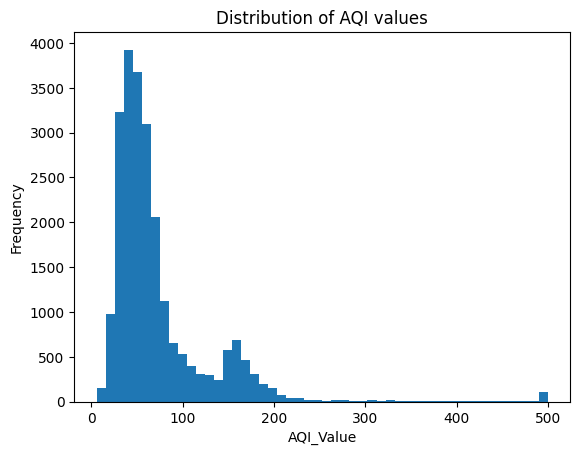

                                Country   AQI_Value
0                           Afghanistan   95.959184
1                               Albania   68.250000
2                               Algeria   88.166667
3                               Andorra   29.333333
4                                Angola   83.925926
..                                  ...         ...
170  Venezuela (Bolivarian Republic of)   77.722222
171                            Viet Nam   87.050000
172                               Yemen  144.571429
173                              Zambia   40.666667
174                            Zimbabwe   43.740741

[175 rows x 2 columns]


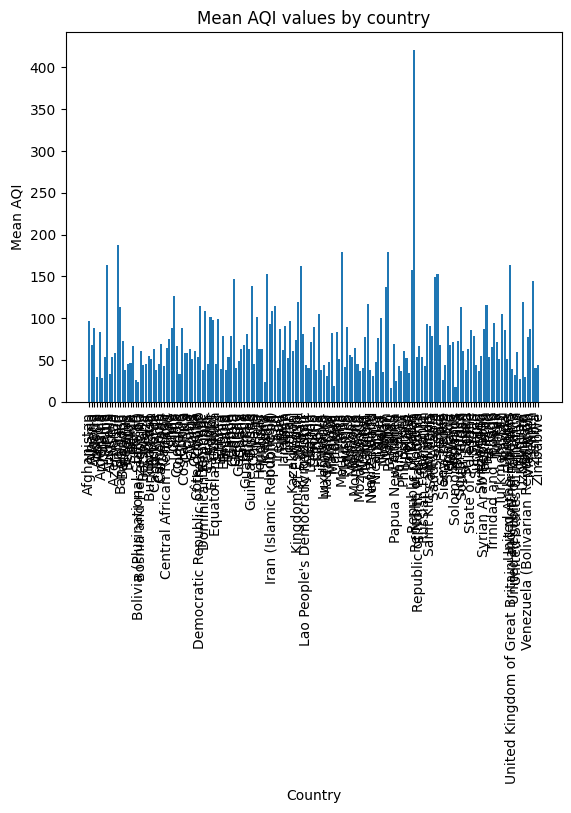

Feature: AQI_Value
Minimum: 6
Maximum: 500
Mean: 72.01086817542513
Mode: 50
Standard deviation: 56.055220252237554

Feature: CO_AQI_Value
Minimum: 0
Maximum: 133
Mean: 1.3683672164684824
Mode: 1
Standard deviation: 1.8320636838211413

Feature: Ozone_AQI_Value
Minimum: 0
Maximum: 235
Mean: 35.19370924434216
Mode: 30
Standard deviation: 28.098723409526933

Feature: NO2_AQI_Value
Minimum: 0
Maximum: 91
Mean: 3.0633337595362913
Mode: 0
Standard deviation: 5.25410842665243

Feature: PM2.5_AQI_Value
Minimum: 0
Maximum: 500
Mean: 68.51975450709628
Mode: 50
Standard deviation: 54.796443160210934



<Axes: >

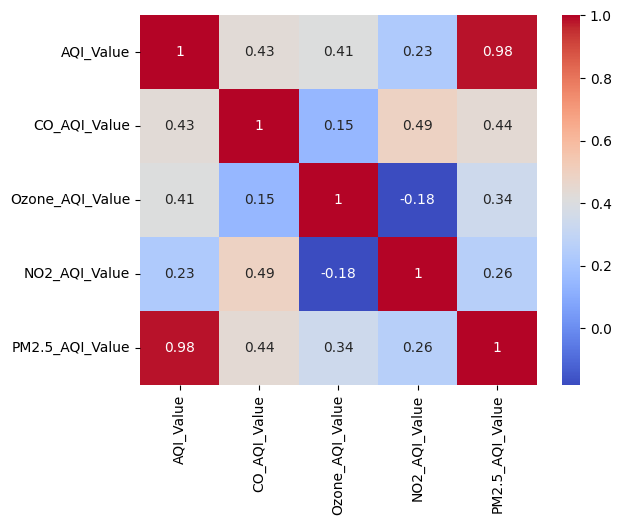

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loads the dataset
df = pd.read_csv("/content/drive/MyDrive/global_air_p.csv")

# Prints the first 5 rows of the dataset
print(df.head())

# Prints the basic statistics of the AQI column
print(df['AQI_Value'].describe())

# Plots a histogram of AQI values
plt.hist(df['AQI_Value'], bins=50)
plt.xlabel('AQI_Value')
plt.ylabel('Frequency')
plt.title('Distribution of AQI values')
plt.show()

# Groups the data by country and calculate the mean AQI for each country
grouped = df.groupby(['Country'])['AQI_Value'].mean().reset_index()
print(grouped)

# Plots a bar chart of mean AQI values by country
plt.bar(grouped['Country'], grouped['AQI_Value'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Mean AQI')
plt.title('Mean AQI values by country')
plt.show()

# Sorts the data by country
df_sorted = df.sort_values(by='Country')

# Bars plot of average PM2.5 concentration by country
pm25_by_country = df.groupby('Country')['PM2.5_AQI_Value'].mean().reset_index()
sns.barplot(x='Country', y='PM2.5_AQI_Value', data=pm25_by_country)

# Selects only the numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64'])

# Computes descriptive statistics for each numerical feature
for feature in num_cols.columns:
    print(f"Feature: {feature}")
    print(f"Minimum: {num_cols[feature].min()}")
    print(f"Maximum: {num_cols[feature].max()}")
    print(f"Mean: {num_cols[feature].mean()}")
    print(f"Mode: {num_cols[feature].mode()[0]}")
    print(f"Standard deviation: {num_cols[feature].std()}")
    print()

# Computes correlation matrix and plot heatmap
corr_matrix = num_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

**Random forest regressor model script**

In [ ]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Loads the dataset
data = pd.read_csv('/content/drive/MyDrive/global_air_p.csv')


X = data.drop(['AQI_Value'], axis=1)
y = data['AQI_Value']
X_scaled = (X - X.mean()) / X.std() 
X_encoded = pd.get_dummies(X_scaled)  

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()

model.fit(X_train, y_train)

#Evaluates the accuracy of model
y_pred = model.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print('R2 score:', accuracy)


<ipython-input-10-5e7883e7f807>:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_scaled = (X - X.mean()) / X.std()
<ipython-input-10-5e7883e7f807>:11: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_scaled = (X - X.mean()) / X.std()


R2 score: 0.9980059654691134


**Gradient Boosting Regression Model**

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/drive/MyDrive/global_air_p.csv')

X = data.drop(['AQI_Value'], axis=1)
y = data['AQI_Value']
X_scaled = (X - X.mean()) / X.std() 
X_encoded = pd.get_dummies(X_scaled)  

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print('R2 score:', accuracy)


<ipython-input-1-c7635659d4eb>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_scaled = (X - X.mean()) / X.std()
<ipython-input-1-c7635659d4eb>:10: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_scaled = (X - X.mean()) / X.std()


R2 score: 0.9966453259094553


Linear Regression Model

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/drive/MyDrive/global_air_p.csv')

X = data.drop(['AQI_Value'], axis=1)
y = data['AQI_Value']
X_scaled = (X - X.mean()) / X.std() 
X_encoded = pd.get_dummies(X_scaled)  

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print('R2 score:', accuracy)


<ipython-input-3-5285cffb0063>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_scaled = (X - X.mean()) / X.std()
<ipython-input-3-5285cffb0063>:10: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_scaled = (X - X.mean()) / X.std()


R2 score: 0.9758391044397207


**Support Vector Regression Model**

In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/drive/MyDrive/global_air_p.csv')

X = data.drop(['AQI_Value'], axis=1)
y = data['AQI_Value']
X_scaled = (X - X.mean()) / X.std() 
X_encoded = pd.get_dummies(X_scaled)  

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = SVR()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print('R2 score:', accuracy)


<ipython-input-4-e4f510932e83>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_scaled = (X - X.mean()) / X.std()
<ipython-input-4-e4f510932e83>:10: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_scaled = (X - X.mean()) / X.std()


R2 score: 0.8363085827308526


**Is there a difference in the AQI values between different cities and countries?**

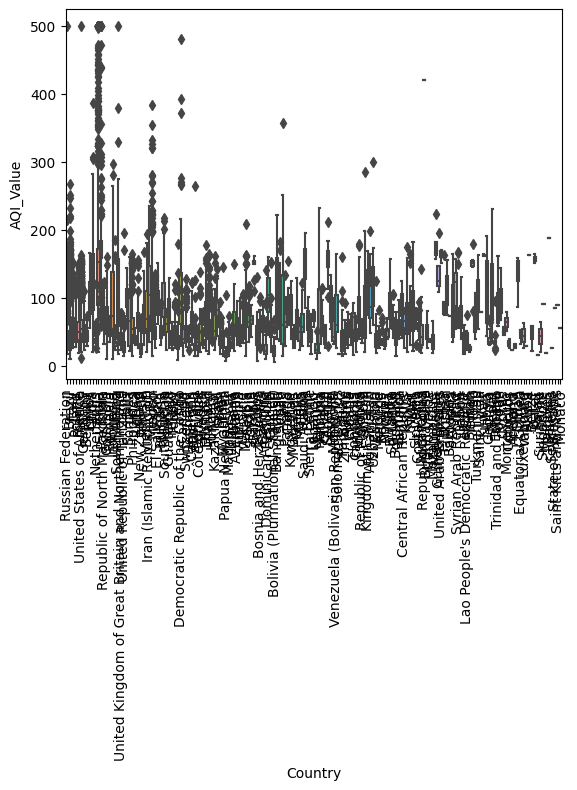

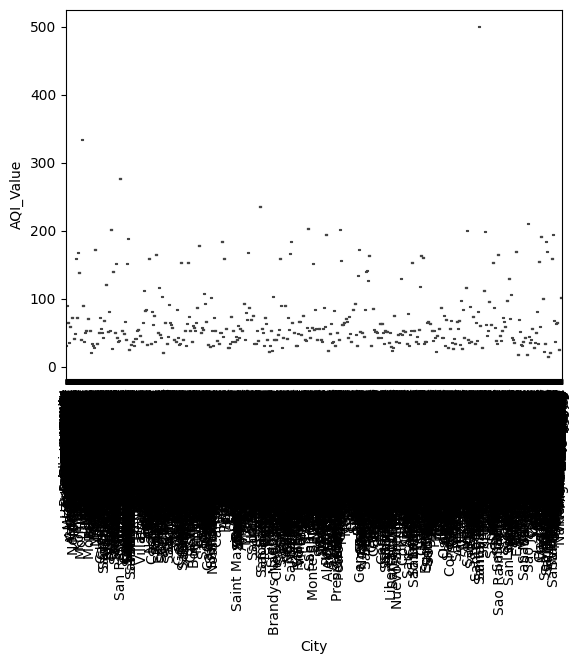

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/global_air_p.csv')

# select columns of interest
df = data[['Country', 'City', 'AQI_Value']]

# drop any missing values
df = df.dropna()

# plot a box plot of AQI values by country
sns.boxplot(x='Country', y='AQI_Value', data=df)
plt.xticks(rotation=90)
plt.show()

# plot a box plot of AQI values by city
sns.boxplot(x='City', y='AQI_Value', data=df)
plt.xticks(rotation=90)
plt.show()
plt.close('all')


**Is there a correlation between the AQI value and the level of PM2.5 in the air?**

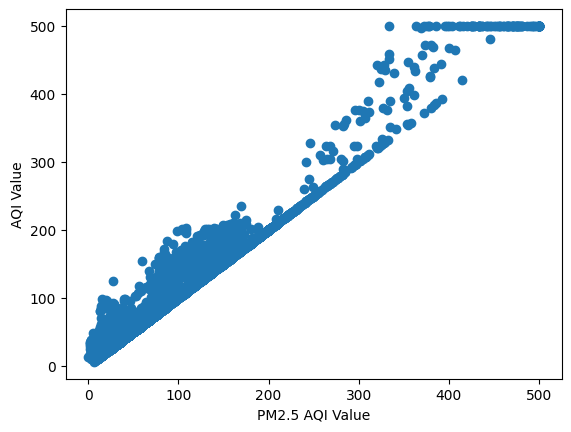

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/global_air_p.csv')

# select columns of interest
df = data[['AQI_Value', 'PM2.5_AQI_Value']]

# drop any missing values
df = df.dropna()

# plot a scatter plot of the two variables
plt.scatter(df['PM2.5_AQI_Value'], df['AQI_Value'])
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('AQI Value')
plt.show()


**How does industrialisation contribute to high levels of air pollution?**

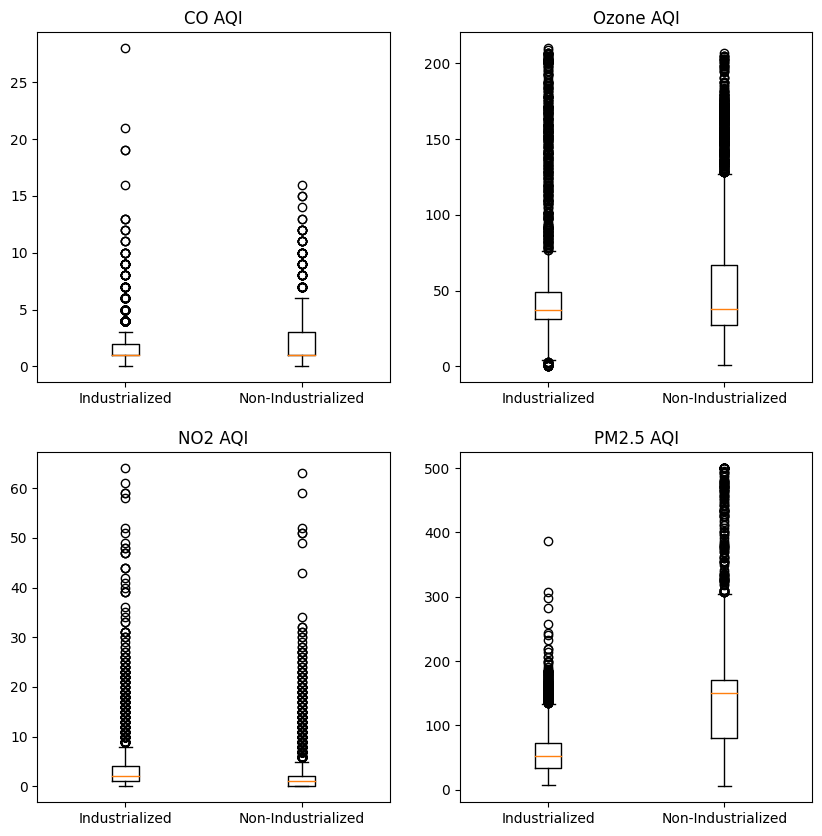

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data
data = pd.read_csv('/content/drive/MyDrive/global_air_p.csv')

# Subset the data to only include cities in industrialized countries
industrialized_countries = ['United States', 'China', 'Japan', 'Germany', 'South Korea']
industrialized_cities = data[data['Country'].isin(industrialized_countries)]

# Subset the data to only include cities in non-industrialized countries
non_industrialized_countries = ['Nigeria', 'India', 'Indonesia', 'Pakistan', 'Bangladesh']
non_industrialized_cities = data[data['Country'].isin(non_industrialized_countries)]

# Calculate summary statistics for air pollutants in the two groups of cities
industrialized_pollutants = industrialized_cities[['CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM2.5_AQI_Value']].describe()
non_industrialized_pollutants = non_industrialized_cities[['CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM2.5_AQI_Value']].describe()

# Visualize the differences in air pollutant levels between the two groups of cities
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].boxplot([industrialized_cities['CO_AQI_Value'], non_industrialized_cities['CO_AQI_Value']])
axes[0, 0].set_xticklabels(['Industrialized', 'Non-Industrialized'])
axes[0, 0].set_title('CO AQI')

axes[0, 1].boxplot([industrialized_cities['Ozone_AQI_Value'], non_industrialized_cities['Ozone_AQI_Value']])
axes[0, 1].set_xticklabels(['Industrialized', 'Non-Industrialized'])
axes[0, 1].set_title('Ozone AQI')

axes[1, 0].boxplot([industrialized_cities['NO2_AQI_Value'], non_industrialized_cities['NO2_AQI_Value']])
axes[1, 0].set_xticklabels(['Industrialized', 'Non-Industrialized'])
axes[1, 0].set_title('NO2 AQI')

axes[1, 1].boxplot([industrialized_cities['PM2.5_AQI_Value'], non_industrialized_cities['PM2.5_AQI_Value']])
axes[1, 1].set_xticklabels(['Industrialized', 'Non-Industrialized'])
axes[1, 1].set_title('PM2.5 AQI')

plt.show()


**•	How does air pollution affect air quality?**

Country               427
City                    1
AQI_Value               0
AQI_Category            0
CO_AQI_Value            0
CO_AQI_Category         0
Ozone_AQI_Value         0
Ozone_AQI_Category      0
NO2_AQI_Value           0
NO2_AQI_Category        0
PM2.5_AQI_Value         0
PM2.5_AQI_Category      0
dtype: int64
                 AQI_Value  CO_AQI_Value  Ozone_AQI_Value  NO2_AQI_Value  \
AQI_Value         1.000000      0.430602         0.405310       0.231758   
CO_AQI_Value      0.430602      1.000000         0.145724       0.488092   
Ozone_AQI_Value   0.405310      0.145724         1.000000      -0.181818   
NO2_AQI_Value     0.231758      0.488092        -0.181818       1.000000   
PM2.5_AQI_Value   0.984327      0.438557         0.339887       0.260127   

                 PM2.5_AQI_Value  
AQI_Value               0.984327  
CO_AQI_Value            0.438557  
Ozone_AQI_Value         0.339887  
NO2_AQI_Value           0.260127  
PM2.5_AQI_Value         1.000000  


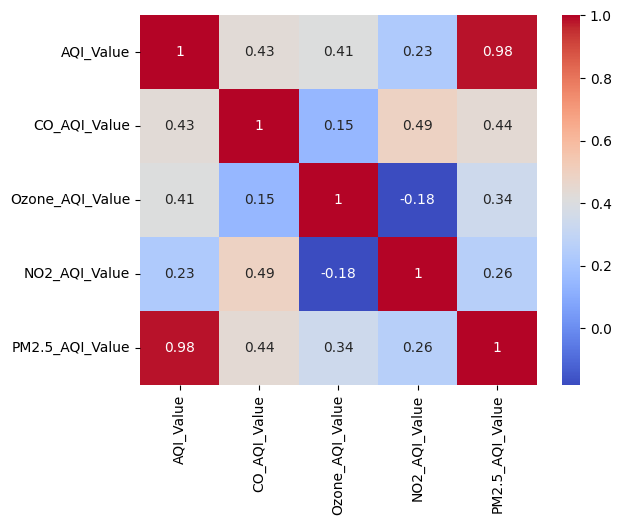

In [ ]:
import pandas as pd
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/global_air_p.csv')

# Check for missing values
print(data.isnull().sum())

# Select relevant columns
relevant_cols = ['AQI_Value', 'CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM2.5_AQI_Value']
df = data[relevant_cols]

# Calculate correlation
corr = df.corr()

# Visualize correlation
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Analyze correlation
print(corr)
